## Figure 14 (Journal of Climate submission; Molina et al.)

Fig. 14. DJF mean SST anomalies ($^{\circ}$C) and surface wind stress (N m$^{-2}$) during (a-f) El Nino (ONI $\geq$ +0.5) and (g-l) La Nina (ONI $\leq$ -0.5) as defined using ONI. Nino 3.4 region indicated with a black polygon. Time periods considered are the same as in Fig. 2.

**Figure by: Maria J. Molina, NCAR**

In [1]:
import xarray as xr
import numpy as np
from climatico import enso
from climatico.util import weighted_mean, pacific_lon
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon
import matplotlib.patches as mpatches

In [2]:
from config import directory_figs, directory_data

In [3]:
ninodata = xr.open_dataset(f'{directory_data}fig10_ninodata.nc')
ninadata = xr.open_dataset(f'{directory_data}fig11_ninadata.nc')
climdata = xr.open_dataset(f'{directory_data}fig11_climodata.nc')

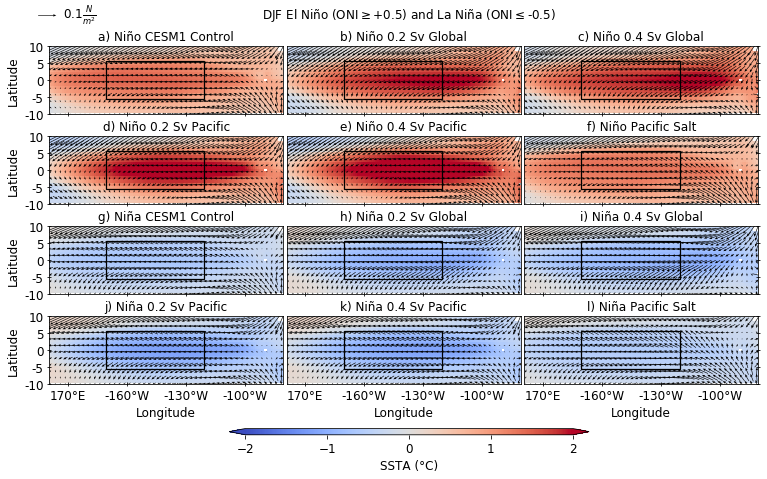

In [4]:
# -------------- create figure

a = u"\u00b0"

fig = plt.figure(figsize=(10,5))

fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña (ONI$\leq$-0.5)', x=0.5, y=1.05, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.19])

ax1.set_title('a) Niño CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['cntrl_diff_nino'].values-climdata['cntrl_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax1.margins(x=0,y=0)

Q1 = ax1.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['cntrl_diff_ninotx'].values[::2, ::2], 
                ninodata['cntrl_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=0.79+0.5)

Q1._init()

qk = ax1.quiverkey(Q1, 0.01, 1.025, 0.1, r'$0.1 \frac{N}{m^2}$', labelpos='E', 
                   fontproperties={'size': '12'},
                   coordinates='figure')

ax1.set_yticks([-10,-5,0,5,10])
ax1.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax1.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax1.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax1.add_patch(poly)

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.19])

ax2.set_title('b) Niño 0.2 Sv Global', fontsize=12)

ax2.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g02sv_diff_nino'].values-climdata['g02sv_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax2.margins(x=0,y=0)

Q2 = ax2.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g02sv_diff_ninotx'].values[::2, ::2],
                ninodata['g02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax2.set_yticks([-10,-5,0,5,10])
ax2.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax2.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax2.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax2.add_patch(poly)

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.19])

ax3.set_title('c) Niño 0.4 Sv Global', fontsize=12)

ax3.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g04sv_diff_nino'].values-climdata['g04sv_diff_climo'].values,
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax3.margins(x=0,y=0)

ax3.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax3.set_yticks([-10,-5,0,5,10])
ax3.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax3.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax3.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax3.add_patch(poly)

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.19])

ax4.set_title('d) Niño 0.2 Sv Pacific', fontsize=12)

ax4.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p02sv_diff_nino'].values-climdata['p02sv_diff_climo'].values,
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax4.margins(x=0,y=0)

ax4.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax4.set_yticks([-10,-5,0,5,10])
ax4.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax4.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax4.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False,
                direction='inout', labelbottom=False, bottom=True)
ax4.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax4.add_patch(poly)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.19])

ax5.set_title('e) Niño 0.4 Sv Pacific', fontsize=12)

ax5.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p04sv_diff_nino'].values-climdata['p04sv_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax5.margins(x=0,y=0)

ax5.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax5.set_yticks([-10,-5,0,5,10])
ax5.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax5.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax5.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax5.add_patch(poly)

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.19])

ax6.set_title('f) Niño Pacific Salt', fontsize=12)

cs2 = ax6.pcolormesh(
                ninodata.coords['lon'].values,
                ninodata.coords['lat'].values,
                ninodata['psalt_diff_nino'].values-climdata['psalt_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax6.margins(x=0,y=0)

ax6.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['psalt_diff_ninotx'].values[::2, ::2], 
                ninodata['psalt_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax6.set_yticks([-10,-5,0,5,10])
ax6.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax6.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax6.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax6.add_patch(poly)

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.19])

ax7.set_title('g) Niña CESM1 Control', fontsize=12)

ax7.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['cntrl_diff_nina'].values-climdata['cntrl_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax7.margins(x=0,y=0)

ax7.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['cntrl_diff_ninatx'].values[::2, ::2], 
                ninadata['cntrl_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax7.set_yticks([-10,-5,0,5,10])
ax7.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax7.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax7.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax7.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax7.add_patch(poly)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.19])

ax8.set_title('h) Niña 0.2 Sv Global', fontsize=12)

ax8.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g02sv_diff_nina'].values-climdata['g02sv_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax8.margins(x=0,y=0)

ax8.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g02sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g02sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax8.set_yticks([-10,-5,0,5,10])
ax8.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax8.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax8.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax8.add_patch(poly)

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.19])

ax9.set_title('i) Niña 0.4 Sv Global', fontsize=12)

ax9.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g04sv_diff_nina'].values-climdata['g04sv_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax9.margins(x=0,y=0)

ax9.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g04sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g04sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax9.set_yticks([-10,-5,0,5,10])
ax9.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax9.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax9.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax9.add_patch(poly)

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.19])

ax10.set_title('j) Niña 0.2 Sv Pacific', fontsize=12)

ax10.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p02sv_diff_nina'].values-climdata['p02sv_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax10.margins(x=0,y=0)

ax10.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p02sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p02sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax10.set_yticks([-10,-5,0,5,10])
ax10.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax10.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax10.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax10.set_xlabel(u'Longitude', fontsize=12)
ax10.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax10.add_patch(poly)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.19])

ax11.set_title('k) Niña 0.4 Sv Pacific', fontsize=12)

ax11.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p04sv_diff_nina'].values-climdata['p04sv_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax11.margins(x=0,y=0)

ax11.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p04sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p04sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax11.set_yticks([-10,-5,0,5,10])
ax11.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax11.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax11.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax11.set_xlabel('Longitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax11.add_patch(poly)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.19])

ax12.set_title('l) Niña Pacific Salt', fontsize=12)

ax12.pcolormesh(ninadata.coords['lon'].values,
                ninadata.coords['lat'].values,
                ninadata['psalt_diff_nina'].values-climdata['psalt_diff_climo'].values, 
                cmap='coolwarm', vmin=-2, vmax=2, shading='auto')

ax12.margins(x=0,y=0)

ax12.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['psalt_diff_ninatx'].values[::2, ::2], 
            ninadata['psalt_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax12.set_yticks([-10,-5,0,5,10])
ax12.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax12.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax12.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax12.set_xlabel('Longitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax12.add_patch(poly)

# --------------

cbar_ax = fig.add_axes([0.25, -0.14, 0.5, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:],
                    orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('SSTA ('+a+'C)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig14.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig14.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------

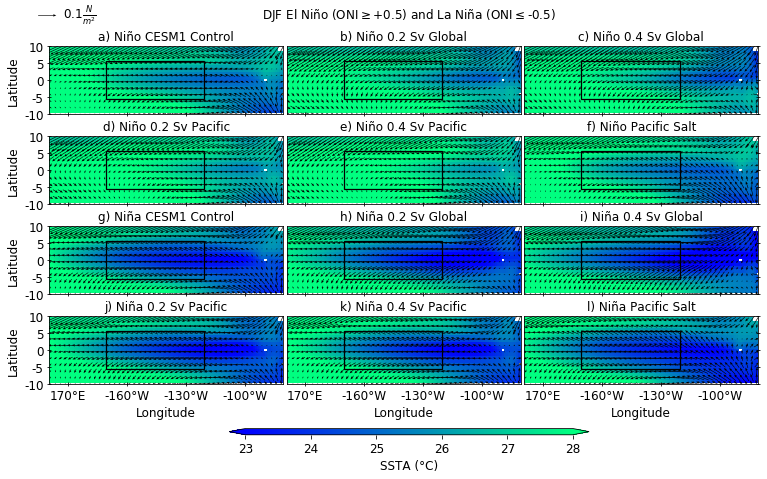

In [5]:
# -------------- create figure

a = u"\u00b0"

fig = plt.figure(figsize=(10,5))

fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña (ONI$\leq$-0.5)', x=0.5, y=1.05, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.19])

ax1.set_title('a) Niño CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['cntrl_diff_nino'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax1.margins(x=0,y=0)

Q1 = ax1.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['cntrl_diff_ninotx'].values[::2, ::2], 
                ninodata['cntrl_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=0.79+0.5)

Q1._init()

qk = ax1.quiverkey(Q1, 0.01, 1.025, 0.1, r'$0.1 \frac{N}{m^2}$', labelpos='E', 
                   fontproperties={'size': '12'},
                   coordinates='figure')

ax1.set_yticks([-10,-5,0,5,10])
ax1.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax1.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax1.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax1.add_patch(poly)

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.19])

ax2.set_title('b) Niño 0.2 Sv Global', fontsize=12)

ax2.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g02sv_diff_nino'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax2.margins(x=0,y=0)

Q2 = ax2.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g02sv_diff_ninotx'].values[::2, ::2],
                ninodata['g02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax2.set_yticks([-10,-5,0,5,10])
ax2.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax2.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax2.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax2.add_patch(poly)

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.19])

ax3.set_title('c) Niño 0.4 Sv Global', fontsize=12)

ax3.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g04sv_diff_nino'].values,
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax3.margins(x=0,y=0)

ax3.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax3.set_yticks([-10,-5,0,5,10])
ax3.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax3.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax3.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax3.add_patch(poly)

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.19])

ax4.set_title('d) Niño 0.2 Sv Pacific', fontsize=12)

ax4.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p02sv_diff_nino'].values,
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax4.margins(x=0,y=0)

ax4.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax4.set_yticks([-10,-5,0,5,10])
ax4.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax4.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax4.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False,
                direction='inout', labelbottom=False, bottom=True)
ax4.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax4.add_patch(poly)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.19])

ax5.set_title('e) Niño 0.4 Sv Pacific', fontsize=12)

ax5.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p04sv_diff_nino'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax5.margins(x=0,y=0)

ax5.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax5.set_yticks([-10,-5,0,5,10])
ax5.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax5.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax5.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax5.add_patch(poly)

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.19])

ax6.set_title('f) Niño Pacific Salt', fontsize=12)

cs2 = ax6.pcolormesh(
                ninodata.coords['lon'].values,
                ninodata.coords['lat'].values,
                ninodata['psalt_diff_nino'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax6.margins(x=0,y=0)

ax6.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['psalt_diff_ninotx'].values[::2, ::2], 
                ninodata['psalt_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax6.set_yticks([-10,-5,0,5,10])
ax6.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax6.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax6.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax6.add_patch(poly)

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.19])

ax7.set_title('g) Niña CESM1 Control', fontsize=12)

ax7.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['cntrl_diff_nina'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax7.margins(x=0,y=0)

ax7.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['cntrl_diff_ninatx'].values[::2, ::2], 
                ninadata['cntrl_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax7.set_yticks([-10,-5,0,5,10])
ax7.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax7.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax7.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax7.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax7.add_patch(poly)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.19])

ax8.set_title('h) Niña 0.2 Sv Global', fontsize=12)

ax8.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g02sv_diff_nina'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax8.margins(x=0,y=0)

ax8.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g02sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g02sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax8.set_yticks([-10,-5,0,5,10])
ax8.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax8.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax8.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax8.add_patch(poly)

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.19])

ax9.set_title('i) Niña 0.4 Sv Global', fontsize=12)

ax9.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g04sv_diff_nina'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax9.margins(x=0,y=0)

ax9.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g04sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g04sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax9.set_yticks([-10,-5,0,5,10])
ax9.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax9.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax9.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax9.add_patch(poly)

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.19])

ax10.set_title('j) Niña 0.2 Sv Pacific', fontsize=12)

ax10.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p02sv_diff_nina'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax10.margins(x=0,y=0)

ax10.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p02sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p02sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax10.set_yticks([-10,-5,0,5,10])
ax10.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax10.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax10.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax10.set_xlabel(u'Longitude', fontsize=12)
ax10.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax10.add_patch(poly)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.19])

ax11.set_title('k) Niña 0.4 Sv Pacific', fontsize=12)

ax11.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p04sv_diff_nina'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax11.margins(x=0,y=0)

ax11.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p04sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p04sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax11.set_yticks([-10,-5,0,5,10])
ax11.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax11.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax11.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax11.set_xlabel('Longitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax11.add_patch(poly)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.19])

ax12.set_title('l) Niña Pacific Salt', fontsize=12)

ax12.pcolormesh(ninadata.coords['lon'].values,
                ninadata.coords['lat'].values,
                ninadata['psalt_diff_nina'].values, 
                cmap='winter', vmin=23, vmax=28, shading='auto')

ax12.margins(x=0,y=0)

ax12.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['psalt_diff_ninatx'].values[::2, ::2], 
            ninadata['psalt_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax12.set_yticks([-10,-5,0,5,10])
ax12.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax12.set_xticks((ninadata.coords['lon']-0.5)[10::30])
ax12.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax12.set_xlabel('Longitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax12.add_patch(poly)

# --------------

cbar_ax = fig.add_axes([0.25, -0.14, 0.5, 0.0175])
ticks_1 = [23,24,25,26,27,28]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:],
                    orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('SSTA ('+a+'C)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig14v2.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------